In [13]:
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
from sklearn.cluster import KMeans
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.cluster import MiniBatchKMeans

In [14]:
# Function to extract descriptors from images
def extract_descriptors(images):
    sift = cv2.SIFT_create()
    descriptors = []
    for img in images:
        kp, des = sift.detectAndCompute(img, None)
        if des is not None:
            descriptors.extend(des)
    return np.array(descriptors)

# Function to create histograms of visual words
def create_histogram(descriptors, codebook):
    histogram = np.zeros(len(codebook))
    if descriptors is not None:
        labels = kmeans.predict(descriptors)
        for label in labels:
            histogram[label] += 1
    return histogram

# Function to load images from a folder
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            images.append(img)
    return images

# Function to load dataset from separate train and test folders
def load_dataset(train_folder, test_folder):
    train_images, train_labels = [], []
    test_images, test_labels = [], []

    for class_id, class_name in enumerate(os.listdir(train_folder)):
        print(class_id,class_name)
        class_train_folder = os.path.join(train_folder, class_name)
        class_test_folder = os.path.join(test_folder, class_name)

        train_images.extend(load_images_from_folder(class_train_folder))
        train_labels.extend([class_id] * len(os.listdir(class_train_folder)))

        test_images.extend(load_images_from_folder(class_test_folder))
        test_labels.extend([class_id] * len(os.listdir(class_test_folder)))

    return np.array(train_images), np.array(train_labels), np.array(test_images), np.array(test_labels)


In [15]:
# Step 1: Load Dataset
train_folder = "UCMerced_LandUse/Images"
test_folder = "test"
class_names = os.listdir(train_folder)

X_train, y_train, X_test, y_test = load_dataset(train_folder, test_folder)


0 agricultural
1 airplane
2 baseballdiamond
3 beach
4 buildings
5 chaparral
6 denseresidential
7 forest
8 freeway
9 golfcourse
10 harbor
11 intersection
12 mediumresidential
13 mobilehomepark
14 overpass
15 parkinglot
16 river
17 runway
18 sparseresidential
19 storagetanks
20 tenniscourt


C:\Users\dell\AppData\Local\Temp/ipykernel_10888/3423948334.py:46: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(train_images), np.array(train_labels), np.array(test_images), np.array(test_labels)


In [16]:
# Step 2: Feature Extraction
train_descriptors = extract_descriptors(X_train)

In [17]:
kmeans = MiniBatchKMeans(n_clusters=100, batch_size=1000)
kmeans.fit(train_descriptors)
codebook = kmeans.cluster_centers_

In [18]:
# Step 4: Feature Encoding for Training Set
sift = cv2.SIFT_create()
X_train_encoded = []
for img in X_train:
    kp, des = sift.detectAndCompute(img, None)
    histogram = create_histogram(des, codebook)
    X_train_encoded.append(histogram)

X_train_encoded = np.array(X_train_encoded)


In [19]:
# Step 5: Classifier Training
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
svm = LinearSVC()
svm.fit(X_train_scaled, y_train)

# Step 6: Feature Encoding for Testing Set
X_test_encoded = []
for img in X_test:
    kp, des = sift.detectAndCompute(img, None)
    histogram = create_histogram(des, codebook)
    X_test_encoded.append(histogram)

X_test_encoded = np.array(X_test_encoded)


C:\Users\dell\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [20]:
# Step 7: Testing
X_test_scaled = scaler.transform(X_test_encoded)
y_pred = svm.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8095238095238095


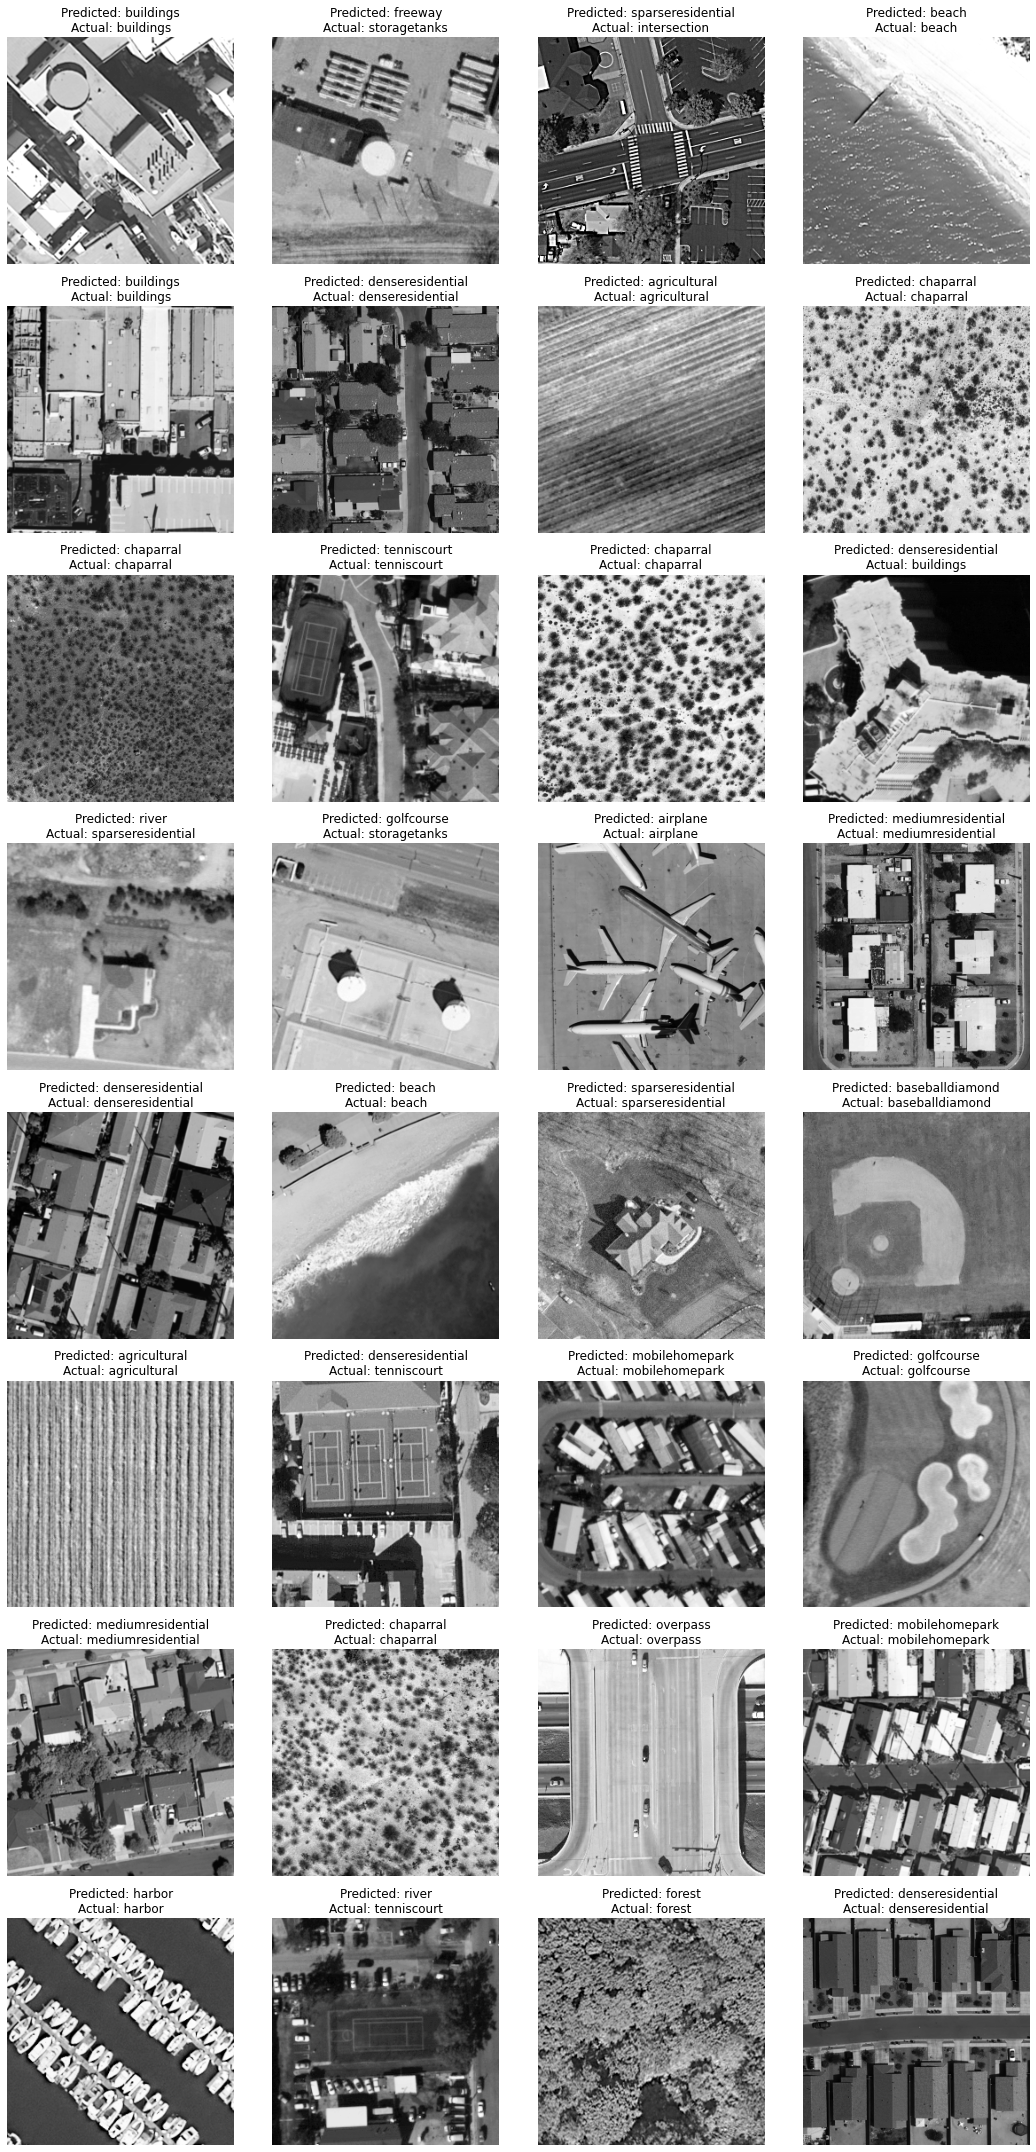

In [21]:
import random
classes = os.listdir("test")
plt.figure(figsize=(15, 30))
# Plot images with their predicted and actual class names sequentially
num_samples = 32
sample_indices = random.sample(range(len(X_test)), num_samples)

for i, idx in enumerate(sample_indices):
    plt.subplot(8, 4, i + 1)
    plt.imshow(X_test[idx], cmap='gray')
    predicted_class = classes[y_pred[idx]]
    actual_class = classes[y_test[idx]]
    plt.title(f"Predicted: {predicted_class}\nActual: {actual_class}")
    plt.axis('off')

plt.tight_layout()
plt.show()

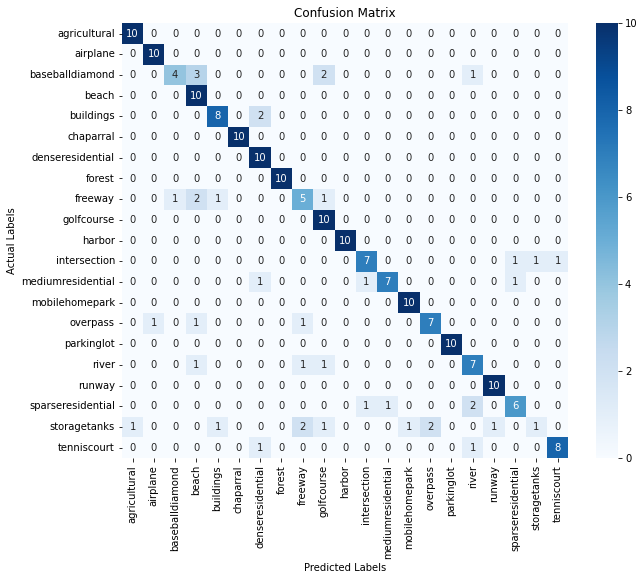

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Step 8: Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

In [23]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1))


Precision: 0.81
Recall: 0.81
F1-score: 0.79
